<a href="https://colab.research.google.com/github/LucasFDutra/titanic_machine_learning_from_disaster/blob/master/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# !pip install -U plotly
# pd.options.plotting.backend = "plotly"

# 2. Aquisição dos dados

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/LucasFDutra/titanic_machine_learning_from_disaster/master/data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Ajuste nos dados

In [4]:
age_mean = data['Age'].mean()
data['Age'] = data['Age'].fillna(age_mean)
data['Sex'] = data['Sex'].apply(lambda x : 0 if x == 'male' else 1)
data['SUM_COLUMN'] = data['PassengerId'].apply(lambda x : 1)

data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,SUM_COLUMN
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.0


# 4. Analise dos dados

## 4.1 Separação dos dados no formato `survived x feature`

In [5]:
survived_pclass = data.loc[:, ['Survived', 'Pclass', 'SUM_COLUMN']].groupby(by=['Survived', 'Pclass']).sum().reset_index(drop=False)
survived_sex = data.loc[:, ['Survived', 'Sex', 'SUM_COLUMN']].groupby(by=['Survived', 'Sex']).sum().reset_index(drop=False)
survived_age = data.loc[:, ['Survived', 'Age', 'SUM_COLUMN']].groupby(by=['Survived', 'Age']).sum().reset_index(drop=False)
survived_sibsp = data.loc[:, ['Survived', 'SibSp', 'SUM_COLUMN']].groupby(by=['Survived', 'SibSp']).sum().reset_index(drop=False)
survived_ticket = data.loc[:, ['Survived', 'Ticket', 'SUM_COLUMN']].groupby(by=['Survived', 'Ticket']).sum().reset_index(drop=False)
survived_fare = data.loc[:, ['Survived', 'Fare', 'SUM_COLUMN']].groupby(by=['Survived', 'Fare']).sum().reset_index(drop=False)
survived_cabin = data.loc[:, ['Survived', 'Cabin', 'SUM_COLUMN']].groupby(by=['Survived', 'Cabin']).sum().reset_index(drop=False)
survived_embarked = data.loc[:, ['Survived', 'Embarked', 'SUM_COLUMN']].groupby(by=['Survived', 'Embarked']).sum().reset_index(drop=False)
survived_pclass

,Survived,Pclass,SUM_COLUMN
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


## 4.2 Plotando `Survived x Feature`

In [6]:
def plot_bar(dataset, label):
    died = dataset[dataset['Survived'] == 0]
    lived = dataset[dataset['Survived'] == 1]
    labels_d = died[label].unique()
    labels_l = lived[label].unique()

    died = died['SUM_COLUMN'].values
    lived = lived['SUM_COLUMN'].values

    x_d = np.arange(len(labels_d))
    x_l = np.arange(len(labels_l))
    width = 0.35

    plt.bar(x_d - width/2, died, width, label='died')
    plt.bar(x_l + width/2, lived, width, label='lived')
    x = x_d if len(x_d) > len(x_l) else x_l
    labels = labels_d if len(x_d) > len(x_l) else labels_l
    plt.xticks(x, labels)
    plt.legend()

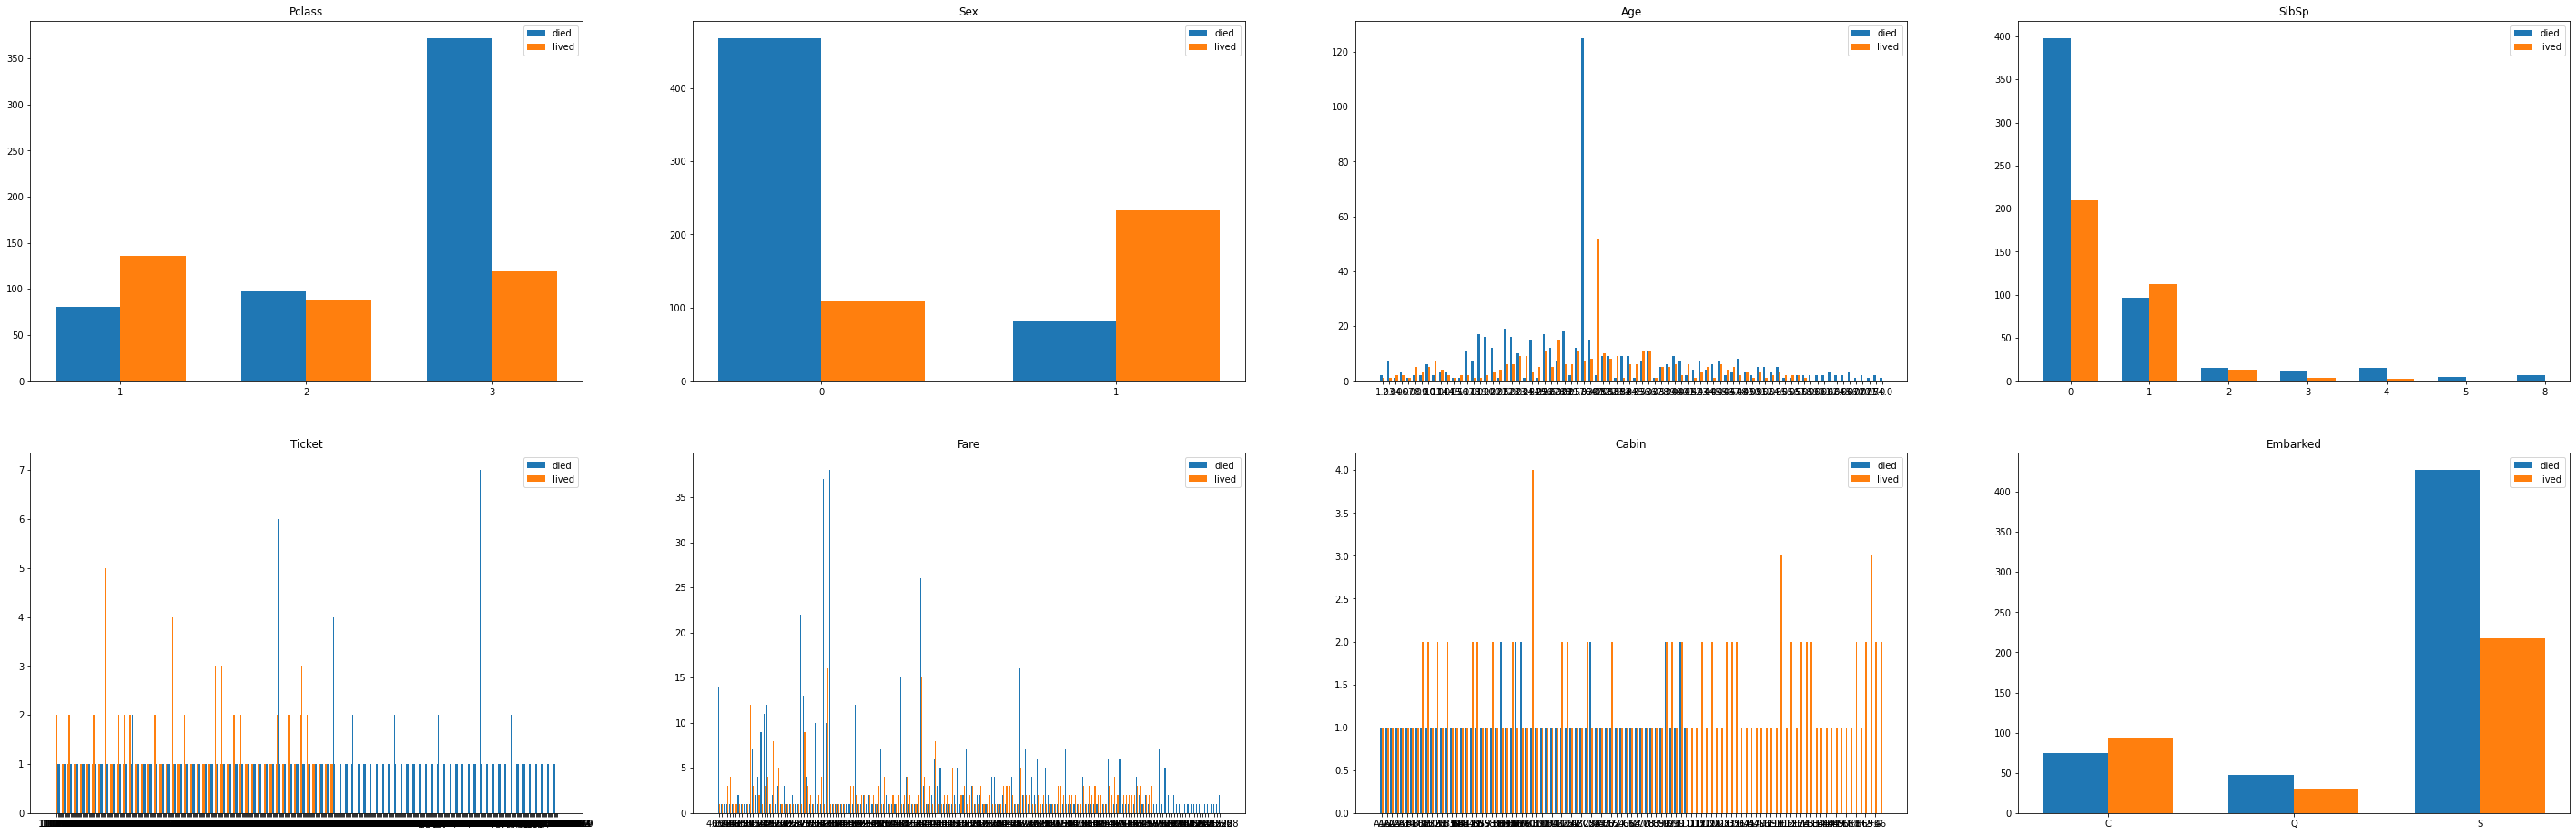

In [7]:
plt.figure(figsize=(50,16), facecolor='white')

plt.subplot(2, 4, 1)
plt.title('Pclass')
plot_bar(survived_pclass, 'Pclass')

plt.subplot(2, 4, 2)
plt.title('Sex')
plot_bar(survived_sex, 'Sex')

plt.subplot(2, 4, 3)
plt.title('Age')
plot_bar(survived_age, 'Age')

plt.subplot(2, 4, 4)
plt.title('SibSp')
plot_bar(survived_sibsp, 'SibSp')

plt.subplot(2, 4, 5)
plt.title('Ticket')
plot_bar(survived_ticket, 'Ticket')

plt.subplot(2, 4, 6)
plt.title('Fare')
plot_bar(survived_fare, 'Fare')

plt.subplot(2, 4, 7)
plt.title('Cabin')
plot_bar(survived_cabin, 'Cabin')

plt.subplot(2, 4, 8)
plt.title('Embarked')
plot_bar(survived_embarked, 'Embarked')

Analisando os gráficos, é possivel notar que:
- 3ª classe tinha mais chance de morrer
- Homens tem mais chance de morrer
- Quem tem uma idade mais próxima da mediana, tem mais chance de morrer
- SibSp = 0 tem mais chances de morrer
- Embarked=S tem mais chances de morrer

O restante não é realmente expressiva as diferenças entre vivos ou mortos.

Logo criarei um modelo me baseando em:

- Pclass
- Sex
- Age
- SibSp
- Embarked

Mas eu sei que Embarked tem alguns registros com nan, então vou tratar isso, colocando os registros iguais ao que já existe mais.

E também colocarei para numérico:

- C -> 1
- Q -> 2
- S -> 3

In [8]:
data.loc[:, ['Embarked', 'SUM_COLUMN']].groupby(by=['Embarked']).sum().reset_index(drop=False)

,Embarked,SUM_COLUMN
0,C,168
1,Q,77
2,S,644


In [9]:
data['Embarked'] = data['Embarked'].fillna('S')
len(data[pd.isna(data['Embarked'])])

0

In [10]:
def convert_embarked(x):
    if (x == 'C'):
        return 1
    elif (x == 'Q'):
        return 2
    elif (x == 'S'):
        return 3

data['Embarked'] = data['Embarked'].apply(lambda x : convert_embarked(x))
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SUM_COLUMN
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,3,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,3,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,3,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,3,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,1,1


# 5. Modelo

## 5.1 Preparando os dados

In [11]:
# x_train = data.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']]
x_train = pd.get_dummies(data.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']], columns=['Pclass', 'Sex', 'SibSp', 'Embarked'])
y_train = data.loc[:, ['Survived']]

## 5.2 Definindo modelo e hiperparâmetros

In [12]:
batch_size = 32
input_len = x_train.shape[1]
epochs = 100
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = checkpoint_dir + "/my_ckpt"
learning_rate = 1e-3

In [13]:
def build_model(input_len):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_len,)),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(70, activation='relu'),
        tf.keras.layers.Dense(30, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

model = build_model(input_len)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               2040      
_________________________________________________________________
dense_1 (Dense)              (None, 70)                8470      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                2130      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 12,671
Trainable params: 12,671
Non-trainable params: 0
_________________________________________________________________


## 5.3 Treinamento

In [14]:
history = model.fit(x=x_train, y=y_train, validation_split=0.2, batch_size=batch_size, epochs=epochs, verbose=0)
model.save_weights(checkpoint_prefix)

## 5.4 Avaliação do modelo

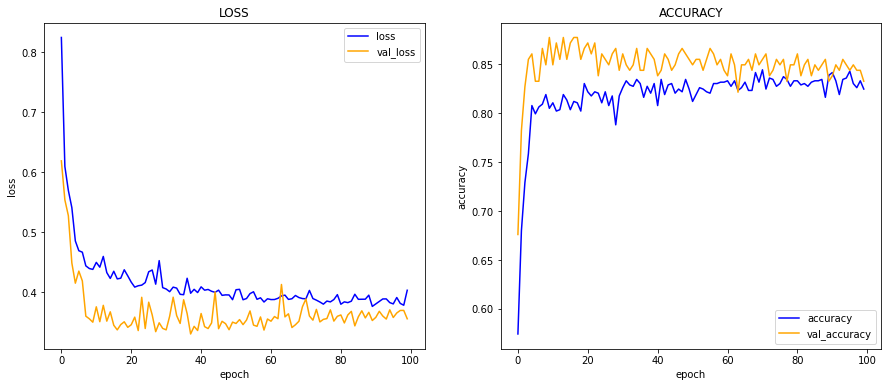

In [15]:
plt.figure(figsize=(15,6), facecolor='white')

plt.subplot(1,2,1)
plt.title('LOSS')
plt.plot(history.history['loss'], c='blue', label='loss')
plt.plot(history.history['val_loss'], c='orange', label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.title('ACCURACY')
plt.plot(history.history['accuracy'], c='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], c='orange', label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

# 6. Submissão

## 6.1 Download dos dados

In [16]:
submission_data = pd.read_csv('https://raw.githubusercontent.com/LucasFDutra/titanic_machine_learning_from_disaster/master/data/test.csv')

## 6.2 Tratamento dos dados

In [17]:
age_mean = submission_data['Age'].mean()
submission_data['Age'] = submission_data['Age'].fillna(age_mean)
submission_data['Sex'] = submission_data['Sex'].apply(lambda x : 0 if x == 'male' else 1)
submission_data['Embarked'] = submission_data['Embarked'].apply(lambda x : convert_embarked(x))
x_submission = pd.get_dummies(submission_data.loc[:, ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']], columns=['Pclass', 'Sex', 'SibSp', 'Embarked'])
x_submission.head()

,PassengerId,Age,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_1,Embarked_2,Embarked_3
0,892,34.5,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
1,893,47.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
2,894,62.0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
3,895,27.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
4,896,22.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1


## 6.3 Reconstrução do modelo

In [18]:
input_len = x_submission.shape[1] - 1
model = model = build_model(input_len=input_len)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 120)               2040      
_________________________________________________________________
dense_5 (Dense)              (None, 70)                8470      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                2130      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 12,671
Trainable params: 12,671
Non-trainable params: 0
_________________________________________________________________


## 6.4 Prevendo

In [19]:
predictions = []
predictions_round = []
i = 0
for x in x_submission.values:
    PassengerId = int(x[0])
    x_to_predict = x[1:].reshape(1, input_len)
    prediction = model(x_to_predict).numpy()
    prediction_round = np.round(prediction).astype('int')[0][0]
    predictions.append([i, prediction[0][0]])
    i += 1
    predictions_round.append([PassengerId, prediction_round])

predictions_df = pd.DataFrame(predictions, columns=['Index', 'Prediction'])

## 6.5 Preparando csv para submissão

In [20]:
all_predictions = pd.DataFrame(predictions_round, columns=['PassengerId', 'Survived'])
all_predictions.to_csv('submission.csv', index=False)
all_predictions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## 6.6 Fazendo uma analise das predições

Se o valor da previsão ficar distante de 0 ou de 1, significa que o modelo tem incerteza de sua previsão. Por exemplo, se o valor fica proximo de 0.5 ele não soube definir com certeza se aquele valore era pertencente a classe 1 ou a classe 0. Logo o modelo fica melhor quando está mais concentrado em torno de 0 ou 1

In [21]:
print(f'o valor da média é de: {predictions_df.mean()}')

o valor da média é de: Index         208.500000
Prediction      0.398229
dtype: float64


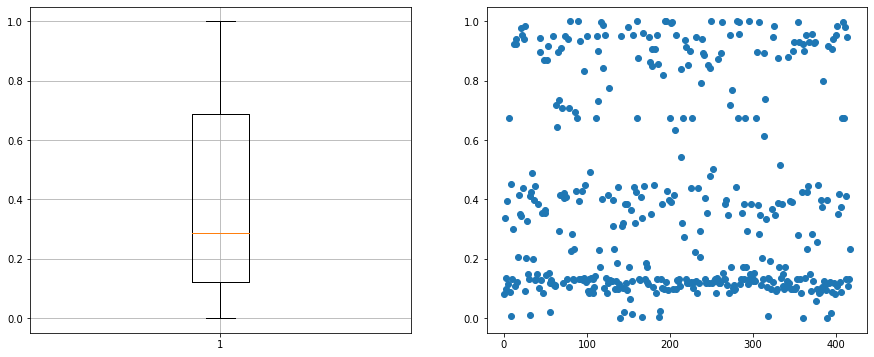

In [22]:
plt.figure(figsize=(15,6), facecolor='white')

plt.subplot(1,2,1)
plt.boxplot(predictions_df['Prediction'])
plt.grid()

plt.subplot(1,2,2)
plt.scatter(x=predictions_df['Index'], y=predictions_df['Prediction'])

In [23]:
f"{round((len(predictions_df[(predictions_df['Prediction'] > 0.3) & (predictions_df['Prediction'] < 0.7)])/len(predictions_df))*100, 2)}% das previsões são relativamente duvidosas"

'24.16% das previsões são relativamente duvidosas'